                           COROMANDEL.NS  CONFIPET.NS  CHOLAHLDNG.NS  \
Date                                                                   
2020-04-01 00:00:00+05:30            NaN          NaN            NaN   
2020-04-03 00:00:00+05:30      -0.042165          NaN      -0.024741   
2020-04-07 00:00:00+05:30      -0.014251          NaN       0.046260   
2020-04-08 00:00:00+05:30       0.012179          NaN      -0.002496   
2020-04-09 00:00:00+05:30       0.033360          NaN       0.025380   
...                                  ...          ...            ...   
2024-09-23 00:00:00+05:30       0.008016     0.004684      -0.002049   
2024-09-24 00:00:00+05:30      -0.005710    -0.040985       0.001212   
2024-09-25 00:00:00+05:30      -0.011245    -0.015715       0.000716   
2024-09-26 00:00:00+05:30      -0.006112     0.015162       0.026713   
2024-09-27 00:00:00+05:30       0.013983    -0.006223      -0.036935   

                           CHAMBLFERT.NS  
Date                

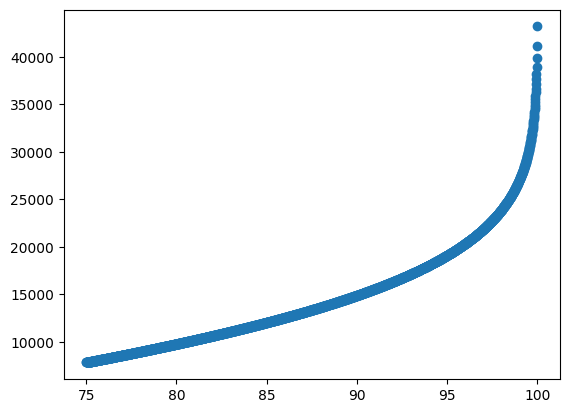

In [ ]:
!pip install yfinance
import pandas_datareader as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt

# Create our portfolio of equities
tickers = ['COROMANDEL.NS','CONFIPET.NS','CHOLAHLDNG.NS','CHAMBLFERT.NS']

# Set the no of shares bought of each stock (I arbitrarily picked for example)
stocks = np.array([250,100,150,200])

# Download closing prices
df=pd.DataFrame()
for i in tickers:
  tick=yf.Ticker(i)
  old  = tick.history(start="2020-04-01",  end="2024-09-30")['Close']
  new=pd.DataFrame(old)
  df[i]=new

#Calculate the initial invested value(Assuming we invested our money today)
initial_investment=stocks*df.iloc[-1,:]

#Calculate returns
returns=df.pct_change()
print(returns)

#Extract the correlation matrix
corr_matrix = returns.corr()

#Get the standard deviation of returns
st_dev=returns.std()

#Declare the confidence and Total Value-at-Risk variables
conf=[]
tot_vaRlist=[]

#Run the simulation for calculating VaR for different confidence intervals and get the list of Total VaR for all values(We took confidence intervals ranging from 75 to 100 with a step of .01)
for i in range(0,2500):
  conf+=[75+i/100]
  vaR=st.norm.ppf(conf[i]/100)*st_dev*initial_investment*-1
  vaRlist=np.array(vaR)
  tot_vaR_sq=np.matmul( np.matmul(vaRlist,corr_matrix.to_numpy()) , np.transpose(vaRlist))
  tot_vaR=np.sqrt(tot_vaR_sq)
  tot_vaRlist+=[tot_vaR]

#Plot the VaR against the different confidence intervals
plt.scatter(conf, tot_vaRlist)
plt.show()